In [3]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)


#### Get Tokenizer

In [4]:
# Get the tokenizer
tokenizer = info.features['text'].encoder

In [5]:
# Print description of features
info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

#### Prepare the dataset

This dataset fills a buffer with `buffer_size` elements, then randomly samples elements from this buffer, replacing the selected elements with new elements. For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required.
#####padded_batch


Like `tf.data.Dataset.batch`, the components of the resulting element will have an additional outer dimension, which will be batch_size (or N % batch_size for the last element if batch_size does not divide the number of input elements N evenly and drop_remainder is False). If your program depends on the batches having the same outer dimension, you should set the drop_remainder argument to True to prevent the smaller batch from being produced.

Unlike `tf.data.Dataset.batch`, the input elements to be batched may have different shapes, and this transformation will pad each component to the respective shape in padded_shapes. The padded_shapes argument determines the resulting shape for each dimension of each component in an output element:


In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'],

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [7]:
tokenizer.vocab_size

8185

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM, GlobalAveragePooling1D, GRU, Conv1D
from tensorflow.keras import Sequential
import pandas as pd

## 1- GlobalAveragePooling1D

Flatten kullanmaya gerek yok çünkü input_shape giremiyorum flatten için input_shape lazım

In [7]:
embedding_dim = 64
dense_dim = 64

model_globalAveragePooling1D =  Sequential([
        Embedding(tokenizer.vocab_size, embedding_dim),
        GlobalAveragePooling1D(),
        Dense(dense_dim, activation = "relu"),
        Dense(1, activation = "sigmoid")])


model_globalAveragePooling1D.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])

model_globalAveragePooling1D.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 528065 (2.01 MB)
Trainable params: 528065 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
num_epochs = 20
history_global = model_globalAveragePooling1D.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/20
98/98 [==============================] - 29s 231ms/step - loss: 0.6919 - accuracy: 0.5335 - val_loss: 0.6880 - val_accuracy: 0.7072
Epoch 2/20
98/98 [==============================] - 18s 179ms/step - loss: 0.6616 - accuracy: 0.6715 - val_loss: 0.6154 - val_accuracy: 0.7352
Epoch 3/20
98/98 [==============================] - 13s 134ms/step - loss: 0.5411 - accuracy: 0.7826 - val_loss: 0.4856 - val_accuracy: 0.8084
Epoch 4/20
98/98 [==============================] - 9s 88ms/step - loss: 0.4103 - accuracy: 0.8526 - val_loss: 0.3944 - val_accuracy: 0.8518
Epoch 5/20
98/98 [==============================] - 9s 87ms/step - loss: 0.3311 - accuracy: 0.8831 - val_loss: 0.3697 - val_accuracy: 0.8434
Epoch 6/20
98/98 [==============================] - 7s 67ms/step - loss: 0.2875 - accuracy: 0.8982 - val_loss: 0.3298 - val_accuracy: 0.8720
Epoch 7/20
98/98 [==============================] - 5s 54ms/step - loss: 0.2576 - accuracy: 0.9070 - val_loss: 0.3243 - val_accuracy: 0.8684
Epoch 8

<Axes: >

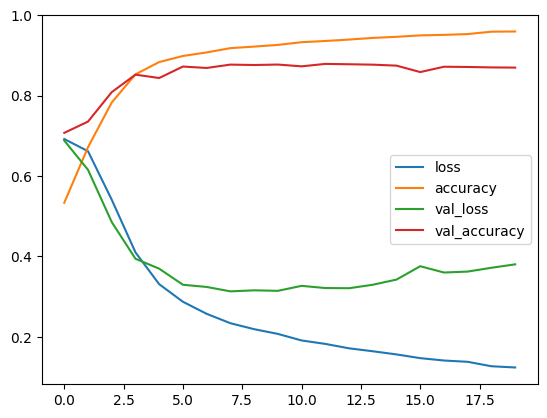

In [9]:
pd.DataFrame(history_global.history).plot()

In [10]:
# Overfit use dropout

In [11]:
embedding_dim = 64
dense_dim = 64

model_globalAveragePooling1D_DROP =  Sequential([
        Embedding(tokenizer.vocab_size, embedding_dim),
        GlobalAveragePooling1D(),
        tf.keras.layers.Dropout(0.2),
        Dense(dense_dim, activation = "relu"),
        tf.keras.layers.Dropout(0.2),
        Dense(128, activation = "relu"),
        Dense(1, activation = "sigmoid")])


model_globalAveragePooling1D_DROP.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])

model_globalAveragePooling1D_DROP.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                      

In [12]:
num_epochs = 20
history_global_DROP = model_globalAveragePooling1D_DROP.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/20
98/98 [==============================] - 19s 179ms/step - loss: 0.6926 - accuracy: 0.5120 - val_loss: 0.6886 - val_accuracy: 0.5844
Epoch 2/20
98/98 [==============================] - 11s 109ms/step - loss: 0.6038 - accuracy: 0.6857 - val_loss: 0.4488 - val_accuracy: 0.8126
Epoch 3/20
98/98 [==============================] - 9s 88ms/step - loss: 0.3577 - accuracy: 0.8511 - val_loss: 0.3439 - val_accuracy: 0.8566
Epoch 4/20
98/98 [==============================] - 8s 78ms/step - loss: 0.2657 - accuracy: 0.8997 - val_loss: 0.3232 - val_accuracy: 0.8684
Epoch 5/20
98/98 [==============================] - 6s 58ms/step - loss: 0.2275 - accuracy: 0.9148 - val_loss: 0.3516 - val_accuracy: 0.8563
Epoch 6/20
98/98 [==============================] - 8s 80ms/step - loss: 0.2103 - accuracy: 0.9208 - val_loss: 0.3094 - val_accuracy: 0.8796
Epoch 7/20
98/98 [==============================] - 6s 57ms/step - loss: 0.1753 - accuracy: 0.9396 - val_loss: 0.3193 - val_accuracy: 0.8794
Epoch 8/2

<Axes: >

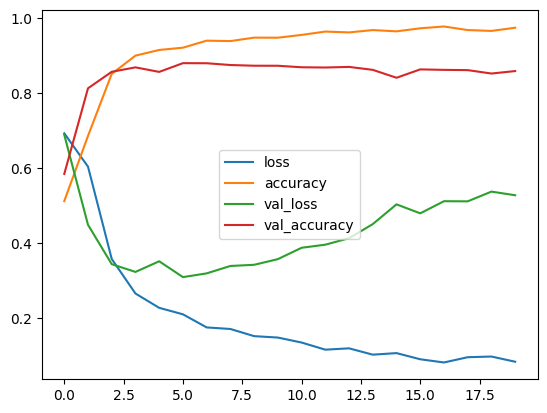

In [13]:
pd.DataFrame(history_global_DROP.history).plot()

## 2-LSTM

In [14]:
embedding_dim = 64


model_multipleLSTM = Sequential([
    Embedding(tokenizer.vocab_size, embedding_dim),
    Bidirectional(LSTM(64, return_sequences = True)),
    Bidirectional(LSTM(32, return_sequences = True)),
    Bidirectional(LSTM(16)),
    Dense(64, activation = "relu"),
    Dense(1, activation = "sigmoid")
])
model_multipleLSTM.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])

model_multipleLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          41216     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                      

In [15]:
NUM_EPOCHS = 20

# Train the model
history_multipleLSTM = model_multipleLSTM.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/20
98/98 [==============================] - 85s 742ms/step - loss: 0.6281 - accuracy: 0.6313 - val_loss: 0.5250 - val_accuracy: 0.7545
Epoch 2/20
98/98 [==============================] - 65s 668ms/step - loss: 0.4501 - accuracy: 0.7986 - val_loss: 0.5051 - val_accuracy: 0.7637
Epoch 3/20
98/98 [==============================] - 57s 577ms/step - loss: 0.3321 - accuracy: 0.8662 - val_loss: 0.4513 - val_accuracy: 0.8040
Epoch 4/20
98/98 [==============================] - 64s 649ms/step - loss: 0.2559 - accuracy: 0.9042 - val_loss: 0.4553 - val_accuracy: 0.8205
Epoch 5/20
98/98 [==============================] - 62s 636ms/step - loss: 0.1967 - accuracy: 0.9314 - val_loss: 0.4842 - val_accuracy: 0.8064
Epoch 6/20
98/98 [==============================] - 60s 615ms/step - loss: 0.1444 - accuracy: 0.9530 - val_loss: 0.5345 - val_accuracy: 0.8315
Epoch 7/20
98/98 [==============================] - 53s 538ms/step - loss: 0.1223 - accuracy: 0.9613 - val_loss: 0.5777 - val_accuracy: 0.8133

In [1]:
pd.DataFrame(history_multipleLSTM).plot()

NameError: ignored

In [9]:
embedding_dim = 64


model_multipleLSTM_DROP = Sequential([
    Embedding(tokenizer.vocab_size, embedding_dim),
    Bidirectional(LSTM(64, return_sequences = True)),
    Bidirectional(LSTM(32, return_sequences = True)),
    Bidirectional(LSTM(16)),
    tf.keras.layers.Dropout(0.2),
    Dense(64, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    Dense(1, activation = "sigmoid")
])
model_multipleLSTM_DROP.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])

model_multipleLSTM_DROP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          41216     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [10]:
NUM_EPOCHS = 20

# Train the model
history_multipleLSTM_DROP = model_multipleLSTM_DROP.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/20
98/98 [==============================] - 91s 748ms/step - loss: 0.5645 - accuracy: 0.6918 - val_loss: 0.4098 - val_accuracy: 0.8447
Epoch 2/20
98/98 [==============================] - 70s 715ms/step - loss: 0.3882 - accuracy: 0.8374 - val_loss: 0.3881 - val_accuracy: 0.8511
Epoch 3/20
98/98 [==============================] - 63s 644ms/step - loss: 0.2591 - accuracy: 0.9042 - val_loss: 0.3920 - val_accuracy: 0.8564
Epoch 4/20
98/98 [==============================] - 58s 587ms/step - loss: 0.1969 - accuracy: 0.9304 - val_loss: 0.4666 - val_accuracy: 0.8006
Epoch 5/20
98/98 [==============================] - 55s 562ms/step - loss: 0.1533 - accuracy: 0.9466 - val_loss: 0.4899 - val_accuracy: 0.8310
Epoch 6/20
98/98 [==============================] - 55s 559ms/step - loss: 0.1237 - accuracy: 0.9592 - val_loss: 0.5469 - val_accuracy: 0.8128
Epoch 7/20
98/98 [==============================] - 54s 555ms/step - loss: 0.1018 - accuracy: 0.9674 - val_loss: 0.6111 - val_accuracy: 0.8428

<Axes: >

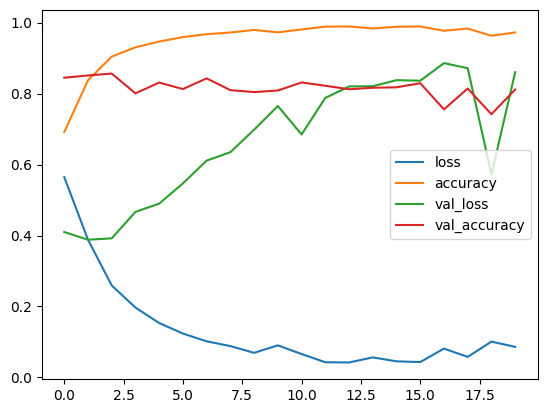

In [11]:
pd.DataFrame(history_multipleLSTM_DROP.history).plot()

## 3-GRU

In [12]:
embedding_dim = 16
gru_dim = 32
dense_dim = 6

model_gru = Sequential([
    Embedding(tokenizer.vocab_size, embedding_dim),
    Bidirectional(GRU(gru_dim)),
    Dense(dense_dim, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model_gru.compile(loss = "binary_crossentropy",
                  optimizer = "adam",
                  metrics = ["accuracy"])
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          130960    
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 140957 (550.61 KB)
Trainable params: 140957 (550.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
NUM_EPOCHS = 20
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(train_dataset, epochs=NUM_EPOCHS, batch_size = BATCH_SIZE,validation_data=test_dataset)

Epoch 1/20
98/98 [==============================] - 36s 314ms/step - loss: 0.6570 - accuracy: 0.5943 - val_loss: 0.5589 - val_accuracy: 0.7198
Epoch 2/20
98/98 [==============================] - 25s 255ms/step - loss: 0.4889 - accuracy: 0.7758 - val_loss: 0.5097 - val_accuracy: 0.7478
Epoch 3/20
98/98 [==============================] - 22s 226ms/step - loss: 0.3405 - accuracy: 0.8598 - val_loss: 0.4226 - val_accuracy: 0.8195
Epoch 4/20
98/98 [==============================] - 19s 195ms/step - loss: 0.2667 - accuracy: 0.9002 - val_loss: 0.4399 - val_accuracy: 0.8152
Epoch 5/20
98/98 [==============================] - 18s 183ms/step - loss: 0.2329 - accuracy: 0.9168 - val_loss: 0.4522 - val_accuracy: 0.8128
Epoch 6/20
98/98 [==============================] - 17s 170ms/step - loss: 0.2085 - accuracy: 0.9270 - val_loss: 0.4800 - val_accuracy: 0.8158
Epoch 7/20
98/98 [==============================] - 17s 170ms/step - loss: 0.1914 - accuracy: 0.9362 - val_loss: 0.5195 - val_accuracy: 0.8060

In [15]:
pd.DataFrame(history_gru.history)

,loss,accuracy,val_loss,val_accuracy
0,0.657022,0.59432,0.558926,0.71976
1,0.488908,0.77576,0.509662,0.74780
2,0.340533,0.85984,0.422645,0.81952
3,0.266654,0.90024,0.439890,0.81524
4,0.232864,0.91680,0.452244,0.81276
5,0.208472,0.92700,0.480047,0.81580
6,0.191447,0.93624,0.519519,0.80600
7,0.174155,0.94232,0.541895,0.81128
8,0.162047,0.94868,0.566562,0.80032
9,0.156936,0.95044,0.569286,0.80764


## 4-Conv1D

In [16]:
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

model_conv1d = Sequential([
    Embedding(tokenizer.vocab_size, embedding_dim),
    Conv1D(filters, kernel_size, activation = "relu"),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv1d.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv1d.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          130960    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         10368     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 142109 (555.11 KB)
Trainable params: 142109 (555.11 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [17]:
NUM_EPOCHS = 20

history_conv = model_conv1d.fit(train_dataset, epochs=NUM_EPOCHS, batch_size = BATCH_SIZE,validation_data=test_dataset)

Epoch 1/20
98/98 [==============================] - 54s 488ms/step - loss: 0.6905 - accuracy: 0.5250 - val_loss: 0.6806 - val_accuracy: 0.6071
Epoch 2/20
98/98 [==============================] - 21s 214ms/step - loss: 0.5875 - accuracy: 0.7560 - val_loss: 0.4668 - val_accuracy: 0.8196
Epoch 3/20
98/98 [==============================] - 14s 139ms/step - loss: 0.3509 - accuracy: 0.8756 - val_loss: 0.3436 - val_accuracy: 0.8625
Epoch 4/20
98/98 [==============================] - 14s 142ms/step - loss: 0.2599 - accuracy: 0.9061 - val_loss: 0.3227 - val_accuracy: 0.8720
Epoch 5/20
98/98 [==============================] - 11s 112ms/step - loss: 0.2197 - accuracy: 0.9221 - val_loss: 0.3167 - val_accuracy: 0.8768
Epoch 6/20
98/98 [==============================] - 11s 110ms/step - loss: 0.1915 - accuracy: 0.9322 - val_loss: 0.3199 - val_accuracy: 0.8781
Epoch 7/20
98/98 [==============================] - 8s 77ms/step - loss: 0.1728 - accuracy: 0.9406 - val_loss: 0.3318 - val_accuracy: 0.8761
E

<Axes: >

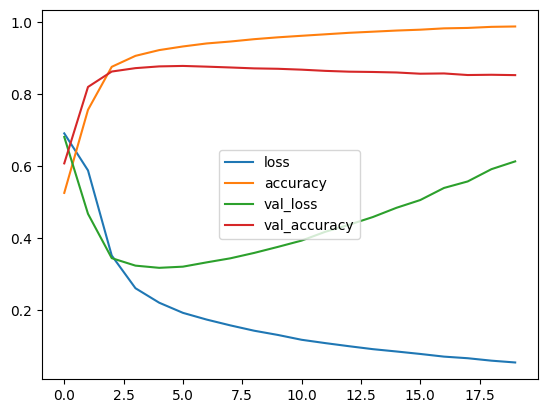

In [19]:
pd.DataFrame(history_conv.history).plot()

In [24]:
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

model_conv1d_DROP = Sequential([
    Embedding(tokenizer.vocab_size, embedding_dim),
    Conv1D(filters, kernel_size, activation = "relu"),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l1(0.01) ),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv1d_DROP.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          130960    
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         10368     
                                                                 
 global_average_pooling1d_2  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                      

In [25]:
model_conv1d_DROP.fit(train_dataset, epochs=NUM_EPOCHS,validation_data=test_dataset)

Epoch 1/20
98/98 [==============================] - 20s 181ms/step - loss: 4.6982 - accuracy: 0.5107 - val_loss: 2.1362 - val_accuracy: 0.5470
Epoch 2/20
98/98 [==============================] - 13s 127ms/step - loss: 1.1035 - accuracy: 0.5640 - val_loss: 0.7073 - val_accuracy: 0.5566
Epoch 3/20
98/98 [==============================] - 12s 116ms/step - loss: 0.6940 - accuracy: 0.5933 - val_loss: 0.6785 - val_accuracy: 0.6115
Epoch 4/20
98/98 [==============================] - 9s 85ms/step - loss: 0.5543 - accuracy: 0.7893 - val_loss: 0.4661 - val_accuracy: 0.8409
Epoch 5/20
98/98 [==============================] - 11s 105ms/step - loss: 0.4070 - accuracy: 0.8779 - val_loss: 0.4060 - val_accuracy: 0.8731
Epoch 6/20
98/98 [==============================] - 10s 97ms/step - loss: 0.3518 - accuracy: 0.9000 - val_loss: 0.3846 - val_accuracy: 0.8772
Epoch 7/20
98/98 [==============================] - 8s 81ms/step - loss: 0.3182 - accuracy: 0.9098 - val_loss: 0.3685 - val_accuracy: 0.8788
Epoc